In [1]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")
#sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import random
import copy

In [2]:
def get_prob(ePrev,eNew,Beta=1):
  proba = min(1, np.exp(-Beta*(eNew-ePrev)))
  return proba

def accept_move_proba(ePrev,eNew,Beta=1):
  proba = 0
  if eNew-ePrev <= 0:
    proba = 1
  else:
    proba = min(1, np.exp(-Beta*(eNew-ePrev)))
  return proba

In [3]:
threshold = 0.1
culling_p =  0.75
fc.SIGMA = 0.006 * (1-culling_p)#*0.25

def custom_force1(m1,m2,withCull,culling_p = 0.75):
  if withCull:
    fc.SIGMA = 0.006 * (1-culling_p)
  else:
    fc.SIGMA = 0.006

  f = fc.total_force_molecule(m1,m2, threshold = threshold) #fc. ,threshold=threshold

  return f 

In [4]:
radius = 100.
max_dist = 15
interdists = np.linspace(0,max_dist,100000)
force_func = custom_force1
away = True
dist_appart = max_dist

m1  = mc.Molecule(np.array([0.,0.,0.]), radius)
m2 = mc.Molecule(np.array([2*radius + max_dist,0.,0.]), radius) #moving closer

if away: #if moving away
  dist_appart = 2#0.5#threshold*2
  interdists = np.linspace(dist_appart,max_dist,100000)
  m2 = mc.Molecule(np.array([2*radius + dist_appart,0.,0.]), radius) #moving closer

ePrev_cull = force_func(m1,m2,True)
ePrev_nocull = force_func(m1,m2,False)

#eNew = force_func(m1,m2)
#prob = accept_move_proba(ePrev,eNew)
#prob_cull =
print(ePrev_cull,ePrev_nocull)

-1.7195400275048702 11.255652534526204


In [5]:
forces = []
cullingps = [0.45,0.6,0.75,0.90]
forces_culled = [[] for _ in cullingps]

for i in interdists:
  dist_between = 2*radius + i
  m1 = mc.Molecule(np.array([0.0,0.0,0.0]),radius)
  m2 = mc.Molecule(np.array([dist_between,0.0,0.0]),radius)

  f = force_func(m1,m2,False)
  forces.append(f)
  for j,cp in enumerate(cullingps):
    f_cull = force_func(m1,m2,True,culling_p=cp)
    forces_culled[j].append(f_cull)


In [6]:
len(forces)

100000

In [7]:
len(forces_culled[0])

100000

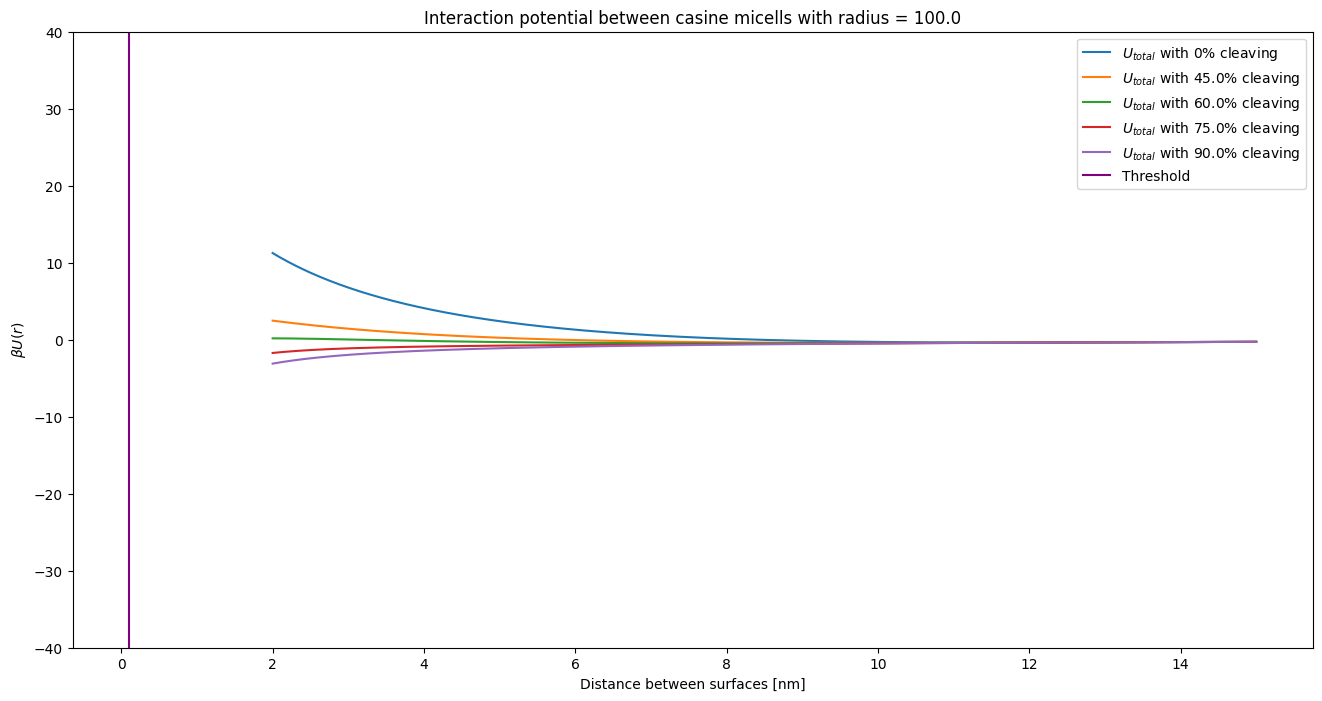

In [8]:
plt.figure(figsize=(16,8))


plt.plot(interdists, forces,  label = "$U_{total}$ with 0% cleaving")

for i,cp in enumerate(cullingps):
  plt.plot(interdists, forces_culled[i],  label = "$U_{total}$ " +  f"with {cp*100}% cleaving")

plt.axvline(x=threshold,label = "Threshold",c="purple")

plt.ylim((-40,40))
#plt.xlim((0,max))
plt.title(f"Interaction potential between casine micells with radius = {radius}")
plt.xlabel("Distance between surfaces [nm]")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()

In [9]:

#print(interdists)
probas = []
probas_cull = []

#e_diffs = []

for d in interdists:
  dist_between = 2*radius + d
  m1 = mc.Molecule(np.array([0.0,0.0,0.0]),radius)
  m2 = mc.Molecule(np.array([dist_between,0.0,0.0]),radius)
  
  _eNew = force_func(m1,m2,False)
  _eNew_cull = force_func(m1,m2,True)
  #e_diffs.append(_eNew-ePrev_cull)

  _prob_cull = accept_move_proba(ePrev_cull,_eNew_cull)
  _prob = accept_move_proba(ePrev_nocull,_eNew)
  probas.append(_prob)
  probas_cull.append(_prob_cull)


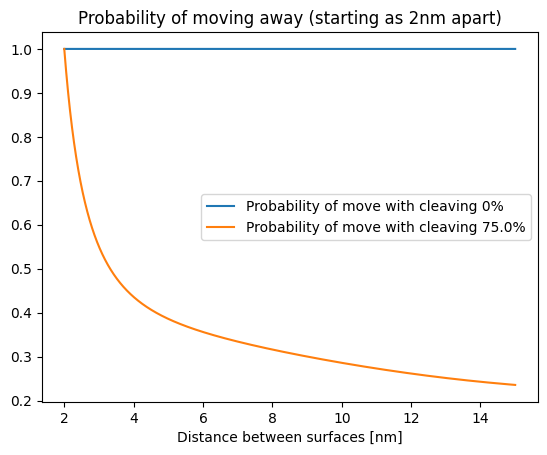

In [10]:
if away == False:
  plt.figure()
  plt.title(f"Probability of moving closer (starting {dist_appart}nm apart)")
  plt.plot(interdists,probas,label=f"Probability of move with cleaving {0*100}%")
  plt.plot(interdists,probas_cull,label=f"Probability of move with cleaving {culling_p*100}%")
  plt.xlabel("Distance between surfaces [nm]")
  plt.legend()
  plt.show()
else:
  plt.figure()
  plt.title(f"Probability of moving away (starting as {dist_appart}nm apart)")
  plt.plot(interdists,probas,label=f"Probability of move with cleaving {0*100}%")
  plt.plot(interdists,probas_cull,label=f"Probability of move with cleaving {culling_p*100}%")
  plt.xlabel("Distance between surfaces [nm]")
  plt.legend()
  plt.show()

In [11]:
# plt.figure()
# plt.plot(interdists,e_diffs,label="Energy difference")
# #plt.yscale("log")
# plt.legend()
# plt.show()